# Model - Actuator Selection

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_core

## Code

In [2]:
sys_model = 'System Model 2'
S = sys_from_file(sys_model)

System read from file @ system_model/System Model 2.pickle 



In [3]:
ret1 = cost_function_1(S)
# print(ret1)

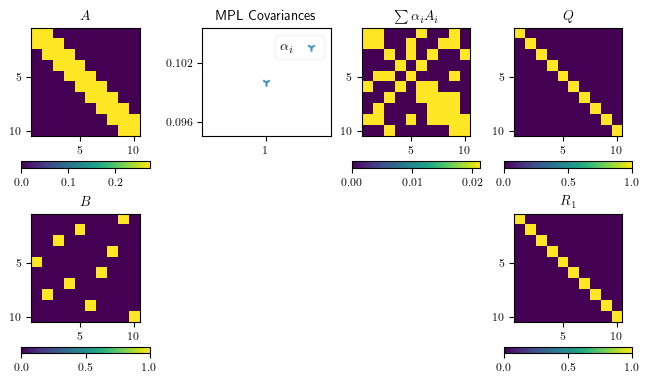

In [4]:
ret2 = actuator_selection_cost_1(S)
system_display_matrix(ret2['system'])

[[nan nan nan nan nan nan nan nan nan  1.  1.]
 [nan nan nan nan nan  2.  2.  2.  2.  2.  2.]
 [nan nan nan  3.  3.  3.  3.  3.  3.  3.  3.]
 [nan nan nan nan nan nan nan nan  4.  4.  4.]
 [nan  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [nan nan nan nan nan nan nan  6.  6.  6.  6.]
 [nan nan nan nan  7.  7.  7.  7.  7.  7.  7.]
 [nan nan  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [nan nan nan nan nan nan  9.  9.  9.  9.  9.]
 [nan nan nan nan nan nan nan nan nan nan 10.]]


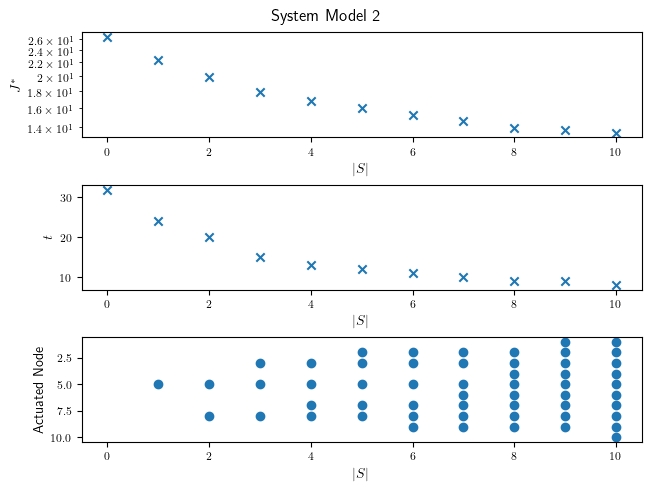

In [5]:
B = np.pad(ret2['system']['B'], ((0,0),(1,0)), 'constant')
if ret1['P_check'] != 0:
    cost0 = np.nan
else:
    cost0 = ret1['J_trend'][-1]
cost = np.insert(ret2['cost_trend'], 0, cost0, axis=0)
time = np.insert(ret2['time_trend'], 0, ret1['t'], axis=0)
check = np.insert(ret2['check_trend'], 0, ret1['P_check'], axis=0)

plot_actuator_selection_1(B, cost, time, check, ret2['system']['label'])